In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import re
from pathlib import Path
import pandas as pd

In [3]:
text = '''
SNL_18650_LFP_15C_0-100_0.5/1C_a	4,551.00	
LFP
graphite
1.10	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_15C_0-100_0.5/1C_b	3,553.00	
LFP
graphite
1.10	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_15C_0-100_0.5/2C_a	3,761.00	
LFP
graphite
1.10	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_LFP_15C_0-100_0.5/2C_b	3,754.00	
LFP
graphite
1.10	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_LFP_25C_0-100_0.5/0.5C_a	3,050.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	0.50	
SNL_18650_LFP_25C_0-100_0.5/1C_a	3,545.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_25C_0-100_0.5/1C_b	3,636.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_25C_0-100_0.5/1C_c	3,038.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_25C_0-100_0.5/1C_d	3,038.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_25C_0-100_0.5/2C_a	3,544.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_LFP_25C_0-100_0.5/2C_b	4,050.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_LFP_25C_0-100_0.5/3C_a	4,569.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_LFP_25C_0-100_0.5/3C_b	4,062.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_LFP_25C_0-100_0.5/3C_c	3,555.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_LFP_25C_0-100_0.5/3C_d	4,062.00	
LFP
graphite
1.10	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_LFP_25C_20-80_0.5/0.5C_a	7,375.00	
LFP
graphite
1.10	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_LFP_25C_20-80_0.5/0.5C_b	8,396.00	
LFP
graphite
1.10	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_LFP_25C_20-80_0.5/0.5C_c	5,945.00	
LFP
graphite
1.10	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_LFP_25C_20-80_0.5/0.5C_d	6,592.00	
LFP
graphite
1.10	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_LFP_25C_20-80_0.5/3C_a	2,959.00	
LFP
graphite
1.10	
18650
snl
25.00	80.00	20.00	60.00	0.50	3.00	
SNL_18650_LFP_25C_40-60_0.5/0.5C_a	19,175.00	
LFP
graphite
1.10	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_LFP_25C_40-60_0.5/0.5C_b	18,166.00	
LFP
graphite
1.10	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_LFP_25C_40-60_0.5/3C_a	12,628.00	
LFP
graphite
1.10	
18650
snl
25.00	60.00	40.00	20.00	0.50	3.00	
SNL_18650_LFP_25C_40-60_0.5/3C_b	11,621.00	
LFP
graphite
1.10	
18650
snl
25.00	60.00	40.00	20.00	0.50	3.00	
SNL_18650_LFP_35C_0-100_0.5/1C_a	3,156.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_35C_0-100_0.5/1C_b	3,342.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_35C_0-100_0.5/1C_c	3,342.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_35C_0-100_0.5/1C_d	3,798.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_LFP_35C_0-100_0.5/2C_a	3,856.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_LFP_35C_0-100_0.5/2C_b	3,598.00	
LFP
graphite
1.10	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_15C_0-100_0.5/1C_a	522.00	
NCA
graphite
3.20	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_15C_0-100_0.5/1C_b	918.00	
NCA
graphite
3.20	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_15C_0-100_0.5/2C_a	916.00	
NCA
graphite
3.20	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_15C_0-100_0.5/2C_b	784.00	
NCA
graphite
3.20	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_25C_0-100_0.5/0.5C_a	513.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	0.50	
SNL_18650_NCA_25C_0-100_0.5/0.5C_b	916.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	0.50	
SNL_18650_NCA_25C_0-100_0.5/1C_a	654.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_25C_0-100_0.5/1C_b	522.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_25C_0-100_0.5/1C_c	522.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_25C_0-100_0.5/1C_d	654.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_25C_0-100_0.5/2C_a	786.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_25C_0-100_0.5/2C_b	786.00	
NCA
graphite
3.20	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_25C_20-80_0.5/0.5C_a	1,160.00	
NCA
graphite
3.20	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NCA_25C_20-80_0.5/0.5C_b	1,294.00	
NCA
graphite
3.20	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NCA_25C_20-80_0.5/0.5C_c	1,292.00	
NCA
graphite
3.20	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NCA_25C_20-80_0.5/0.5C_d	1,529.00	
NCA
graphite
3.20	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NCA_25C_40-60_0.5/0.5C_a	7,878.00	
NCA
graphite
3.20	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_NCA_25C_40-60_0.5/0.5C_b	6,080.00	
NCA
graphite
3.20	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_NCA_35C_0-100_0.5/1C_a	515.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_35C_0-100_0.5/1C_b	464.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00
SNL_18650_NCA_35C_0-100_0.5/1C_c	515.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_35C_0-100_0.5/1C_d	654.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NCA_35C_0-100_0.5/2C_a	654.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NCA_35C_0-100_0.5/2C_b	786.00	
NCA
graphite
3.20	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_15C_0-100_0.5/1C_a	513.00	
NMC
graphite
3.00	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_15C_0-100_0.5/1C_b	513.00	
NMC
graphite
3.00	
18650
snl
15.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_15C_0-100_0.5/2C_a	389.00	
NMC
graphite
3.00	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_15C_0-100_0.5/2C_b	389.00	
NMC
graphite
3.00	
18650
snl
15.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_25C_0-100_0.5/0.5C_a	553.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	0.50	
SNL_18650_NMC_25C_0-100_0.5/0.5C_b	679.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	0.50	
SNL_18650_NMC_25C_0-100_0.5/1C_a	521.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_25C_0-100_0.5/1C_b	785.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_25C_0-100_0.5/1C_c	397.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_25C_0-100_0.5/1C_d	529.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_25C_0-100_0.5/2C_a	661.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_25C_0-100_0.5/2C_b	1,321.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_25C_0-100_0.5/3C_a	730.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_NMC_25C_0-100_0.5/3C_b	552.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_NMC_25C_0-100_0.5/3C_c	698.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_NMC_25C_0-100_0.5/3C_d	905.00	
NMC
graphite
3.00	
18650
snl
25.00	100.00	0.00	100.00	0.50	3.00	
SNL_18650_NMC_25C_20-80_0.5/0.5C_a	4,351.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NMC_25C_20-80_0.5/0.5C_b	3,631.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NMC_25C_20-80_0.5/0.5C_c	1,431.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NMC_25C_20-80_0.5/0.5C_d	3,360.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	0.50	
SNL_18650_NMC_25C_20-80_0.5/3C_a	3,610.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	3.00	
SNL_18650_NMC_25C_20-80_0.5/3C_b	1,542.00	
NMC
graphite
3.00	
18650
snl
25.00	80.00	20.00	60.00	0.50	3.00	
SNL_18650_NMC_25C_40-60_0.5/0.5C_a	11,150.00	
NMC
graphite
3.00	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_NMC_25C_40-60_0.5/0.5C_b	9,122.00	
NMC
graphite
3.00	
18650
snl
25.00	60.00	40.00	20.00	0.50	0.50	
SNL_18650_NMC_25C_40-60_0.5/3C_a	12,918.00	
NMC
graphite
3.00	
18650
snl
25.00	60.00	40.00	20.00	0.50	3.00	
SNL_18650_NMC_25C_40-60_0.5/3C_b	11,149.00	
NMC
graphite
3.00	
18650
snl
25.00	60.00	40.00	20.00	0.50	3.00	
SNL_18650_NMC_35C_0-100_0.5/1C_a	786.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_35C_0-100_0.5/1C_b	786.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_35C_0-100_0.5/1C_c	785.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_35C_0-100_0.5/1C_d	786.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	1.00	
SNL_18650_NMC_35C_0-100_0.5/2C_a	786.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00	
SNL_18650_NMC_35C_0-100_0.5/2C_b	772.00	
NMC
graphite
3.00	
18650
snl
35.00	100.00	0.00	100.00	0.50	2.00
'''

# Parse, Save, Load the Data

In [20]:
def fetch_url():
    regex = re.compile(r'SNL_[0-9]{5}_[A-Z]{3}_[^\t]*')
    src = [i.replace('/', '-') for i in regex.findall(text)]
    for i, link in enumerate(src):
        yield r'https://www.batteryarchive.org/data/' + link + r'_timeseries.csv'
        print(f"({i+1}) Completed: {link}")


def load_battery_data(path):
    os.chdir(path / r'483_ML_BatteryLife/')
    data_path = r'datasets/battery.pkl'
    if not Path('datasets/').is_dir():
        Path("datasets").mkdir(parents=True, exist_ok=True)
    if not Path(data_path).is_file():
        df = pd.concat([pd.read_csv(url) for url in fetch_url()])
        df.to_pickle(data_path)
    return pd.read_pickle(data_path)

In [21]:
battery = load_battery_data(Path(r'/home/jason/'))  # change path to Github repository

In [6]:
battery.info(null_counts=True)

/tmp/ipykernel_13122/3518876297.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  battery.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23888882 entries, 0 to 80104
Data columns (total 11 columns):
 #   Column                       Non-Null Count     Dtype  
---  ------                       --------------     -----  
 0   Date_Time                    23888882 non-null  object 
 1   Test_Time (s)                23888882 non-null  float64
 2   Cycle_Index                  23888882 non-null  float64
 3   Current (A)                  23888882 non-null  float64
 4   Voltage (V)                  23888882 non-null  float64
 5   Charge_Capacity (Ah)         23888882 non-null  float64
 6   Discharge_Capacity (Ah)      23888882 non-null  float64
 7   Charge_Energy (Wh)           23888882 non-null  float64
 8   Discharge_Energy (Wh)        23888882 non-null  float64
 9   Environment_Temperature (C)  23365199 non-null  float64
 10  Cell_Temperature (C)         23365199 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.1+ GB


In [7]:
battery.head()

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,2018-02-01 10:02:10.002962,10.002,1.0,0.0,2.940,0.0,0.0,0.0,0.0,15.163,15.375
1,2018-02-01 10:02:20.016433,20.016,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.148,15.437
2,2018-02-01 10:02:30.031429,30.031,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
3,2018-02-01 10:02:40.046426,40.046,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.240,15.375
4,2018-02-01 10:02:50.061462,50.061,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375


In [8]:
battery.describe()

,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
count,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.336520e+07,2.336520e+07
mean,1.613473e+07,2.841530e+03,-1.981644e-01,3.446082e+00,9.805721e-01,3.515892e-01,3.558338e+00,1.218359e+00,2.491242e+01,2.591522e+01
std,1.366815e+07,3.178384e+03,1.398625e+00,3.230248e-01,1.092508e+00,7.203539e-01,3.933567e+00,2.461379e+00,4.940035e+00,4.842974e+00
min,2.100000e-02,1.000000e+00,-9.998000e+00,-4.646000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.234700e+01,5.605000e+00
25%,4.554111e+06,5.210000e+02,-1.499000e+00,3.280000e+00,4.500000e-01,0.000000e+00,1.525000e+00,0.000000e+00,2.443900e+01,2.447900e+01
50%,1.292059e+07,1.853000e+03,1.000000e-03,3.386000e+00,6.410000e-01,0.000000e+00,2.260000e+00,0.000000e+00,2.475900e+01,2.503300e+01
75%,2.519087e+07,3.684000e+03,5.490000e-01,3.614000e+00,1.036000e+00,4.400000e-01,3.503000e+00,1.513000e+00,2.505700e+01,2.637400e+01
max,6.618272e+07,1.917500e+04,9.999000e+00,9.983000e+00,1.927600e+01,9.735000e+00,6.382100e+01,3.149800e+01,3.729300e+01,5.536100e+01


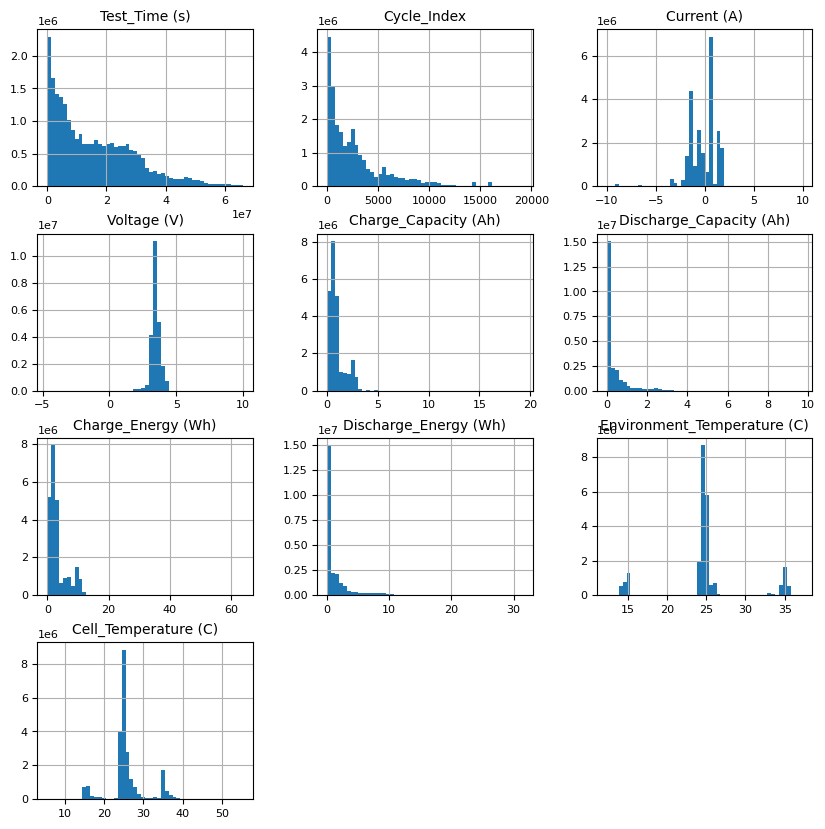

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

battery.hist(bins=50, figsize=(10, 10))
plt.show()